#**The Sparks Foundation GRIP : Data Science and Buisness Analytics**
#**Name : Abdulrahman Khalid**
#**Task 6 : Prediction using The Decision Tree Algorithm**
#**Batch : GRIP_SEPTEMBER22**

**Importing Necssary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

**Importing Datset from Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Sparks Tasks/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Data Preprocessing**

Checking Null Values

In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

No Null values.

No need of any datatype conversions.

Every species category have equal number of data points. Thus, the dataset is not biased

**Preparing Training Data**

In [ ]:
x_train = data.drop(columns=["Species","Id"],axis = 1)
y_train = data["Species"]

In [ ]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y_train.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

Splitting Training Data into Training and Testing Sets

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_train,y_train , test_size=.4 , random_state=33)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler    
scaler= StandardScaler()  
x_train= scaler.fit_transform(x_train)    
x_test= scaler.transform(x_test)

**Model Building**

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3 , criterion='gini' , random_state=0)

In [ ]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Predicting Test Set

In [ ]:
y_pred = classifier.predict(x_test)

Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[17  0  0]
 [ 0 19  1]
 [ 0  1 22]]


In [ ]:
accuracy_score(y_test,y_pred)*100

96.66666666666667

**Tree Visualization**

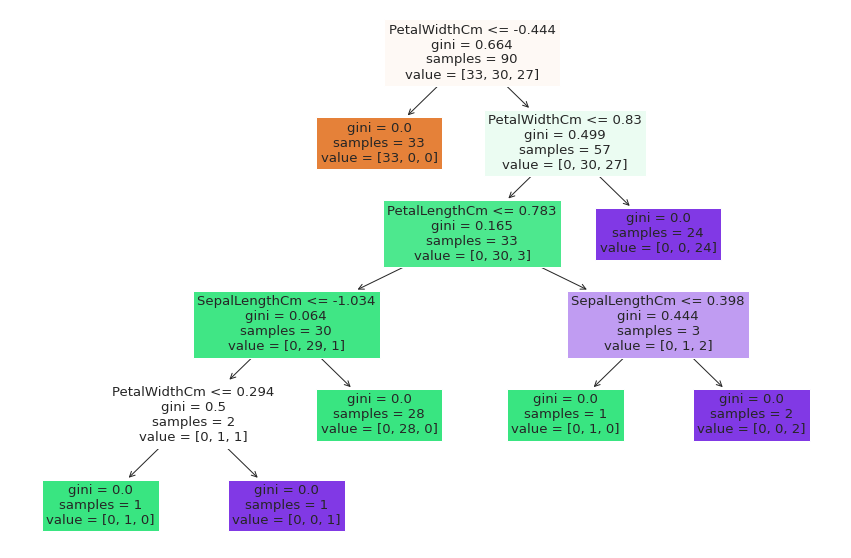

In [ ]:
train_data_columns=data.drop(columns=["Species","Id"]).columns

fig = plt.figure(figsize=(15,10))
tree.plot_tree(classifier, feature_names=train_data_columns, filled=True)
plt.show()